In [ ]:
!nvidia-smi

Wed Oct 16 15:21:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)


In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 257MB/s]
Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 21.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 62.2ms
Speed: 12.6ms preprocess, 62.2ms inference, 762.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpeg', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/predict/dog.jpeg'

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 132.4ms
Speed: 15.0ms preprocess, 132.4ms inference, 784.3ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

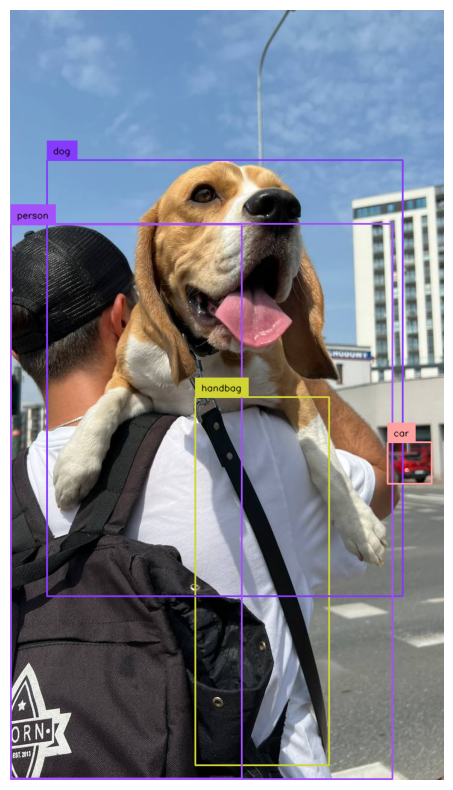

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XdP8NQpTT2okkMBxTP0r")
project = rf.workspace("yolov7-l5zdl").project("garbage-identification-fleit")
version = project.version(17)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Garbage-identification-17 in yolov11:: 100%|██████████| 16180/16180 [00:02<00:00, 6205.17it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 38.8M/38.8M [00:00<00:00, 316MB/s]
Ultralytics 8.3.14 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/datasets/Garbage-identification-17/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		 val_batch0_pred.jpg
confusion_matrix.png				   results.png		 val_batch1_labels.jpg
events.out.tfevents.1728914039.7e84646d6bfa.948.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					   train_batch18640.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch18641.jpg  val_batch2_pred.jpg
labels.jpg					   train_batch18642.jpg  weights
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg


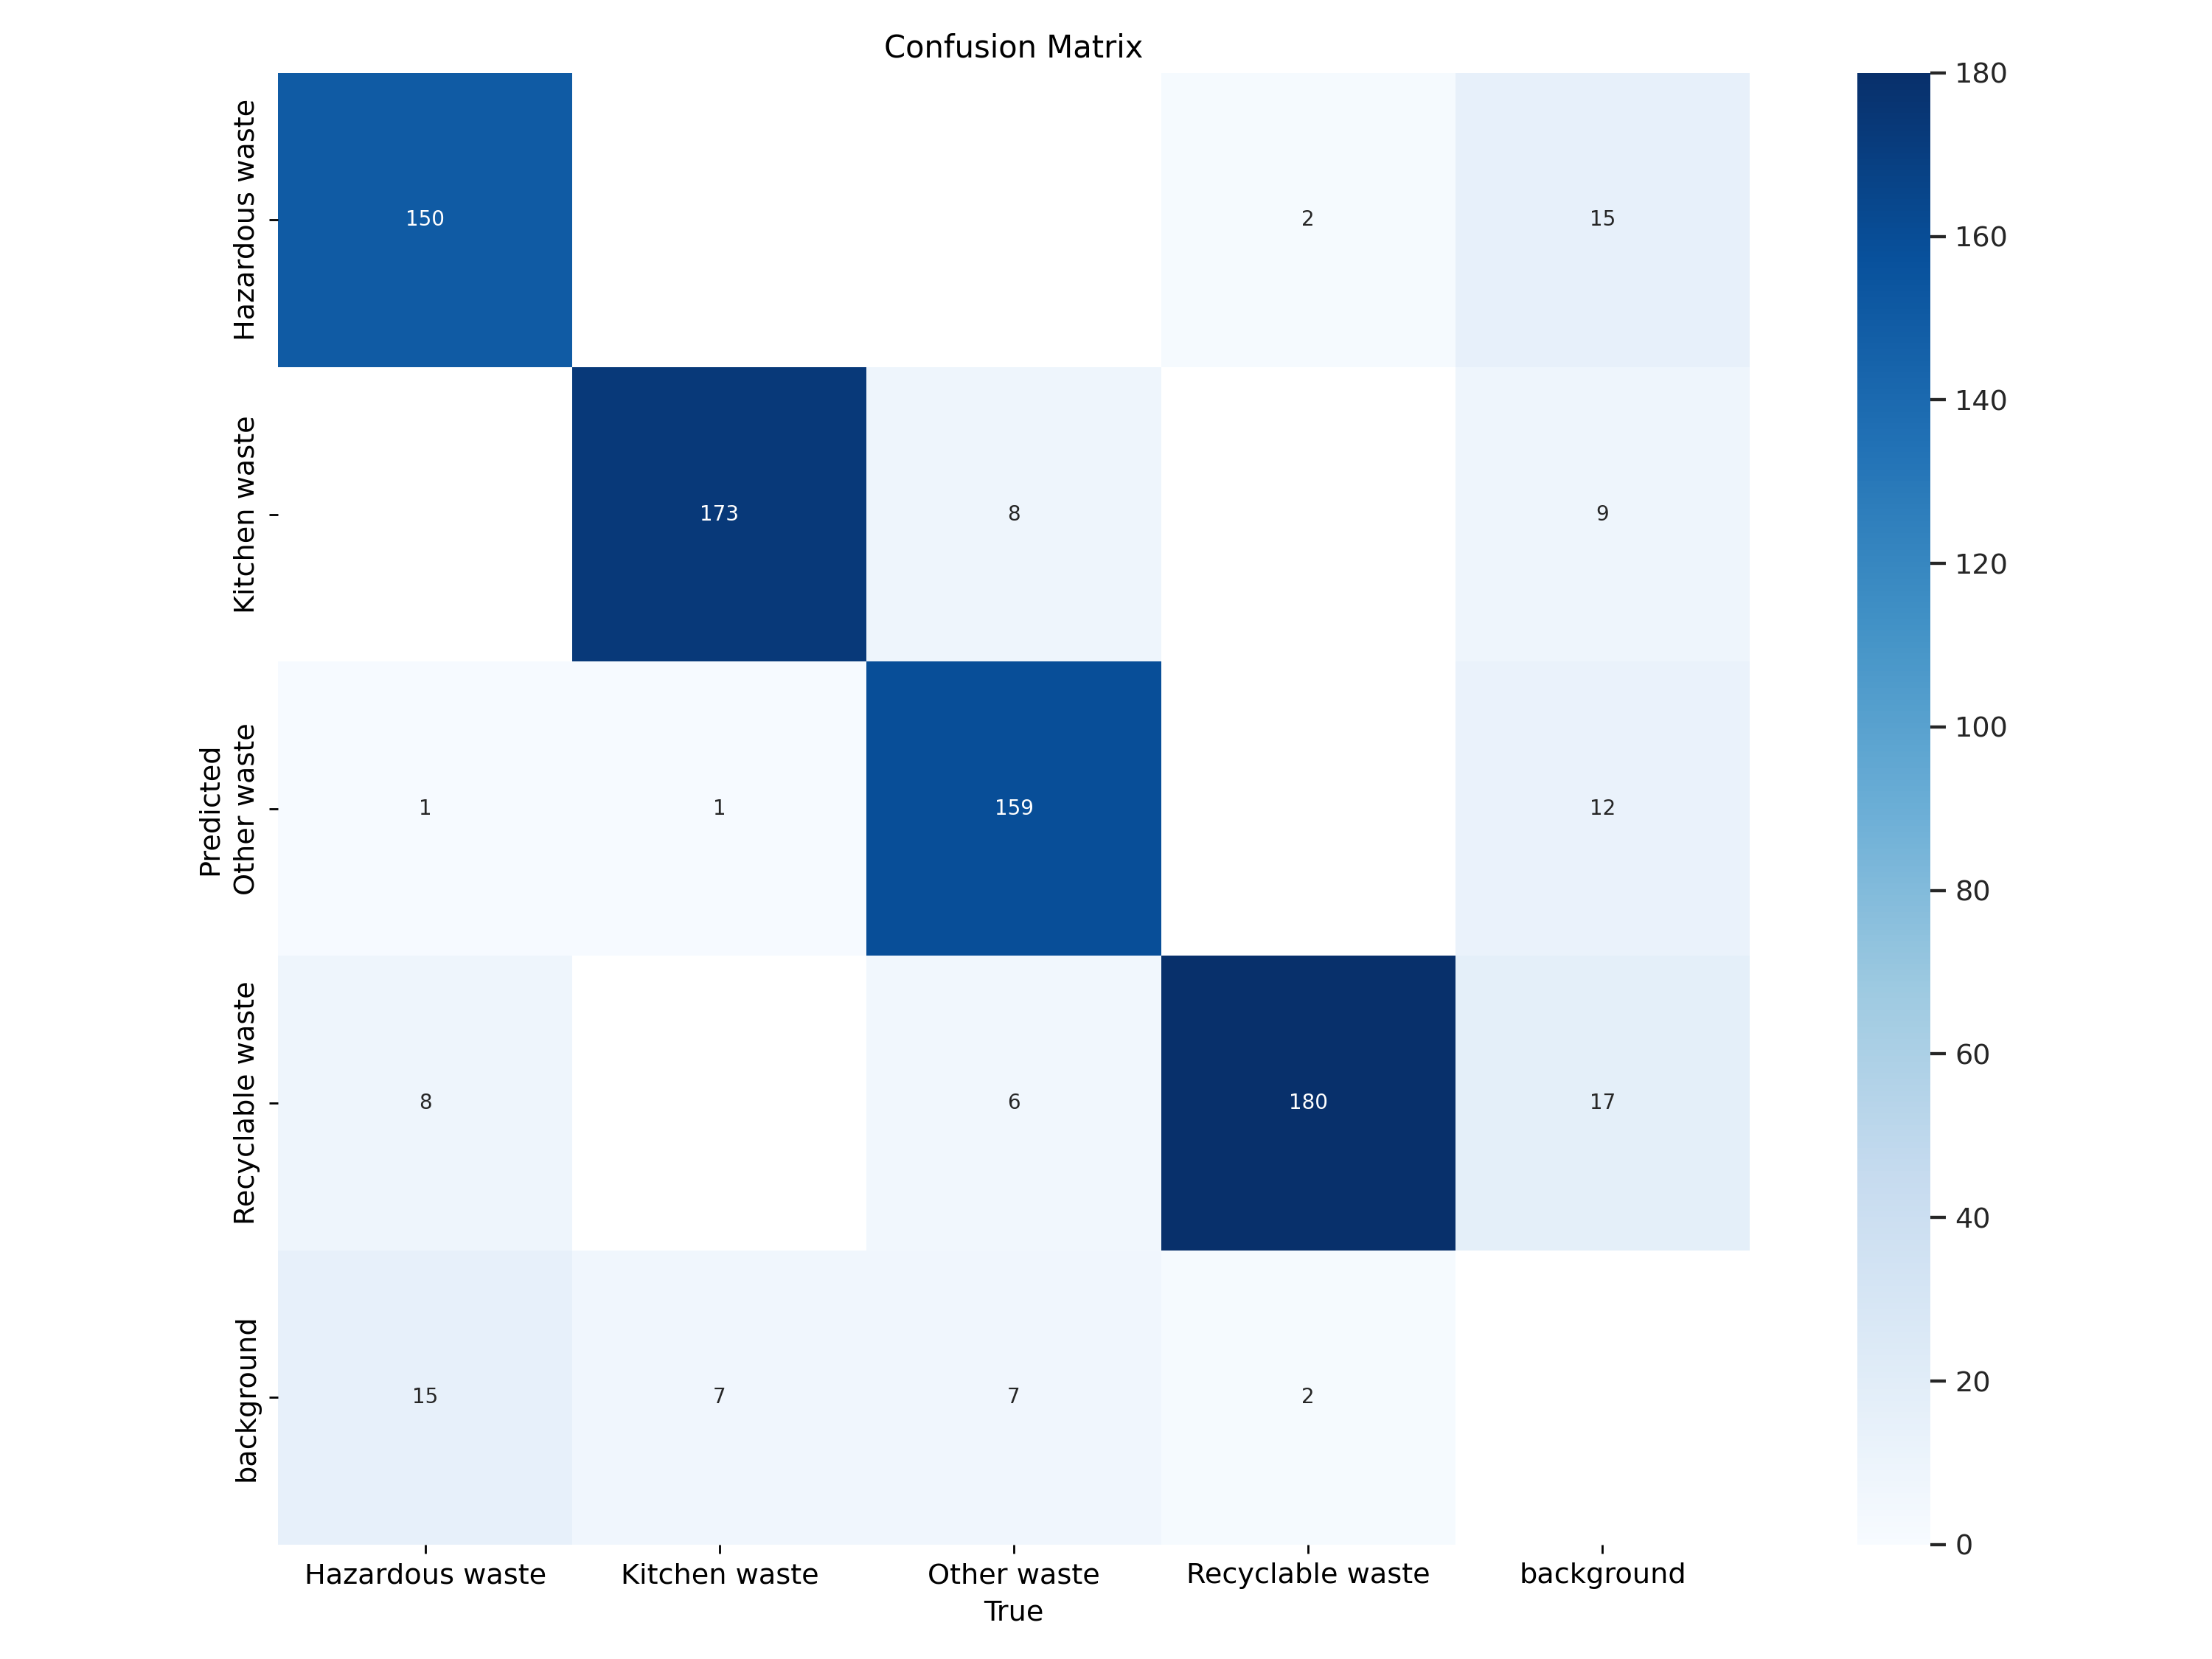

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

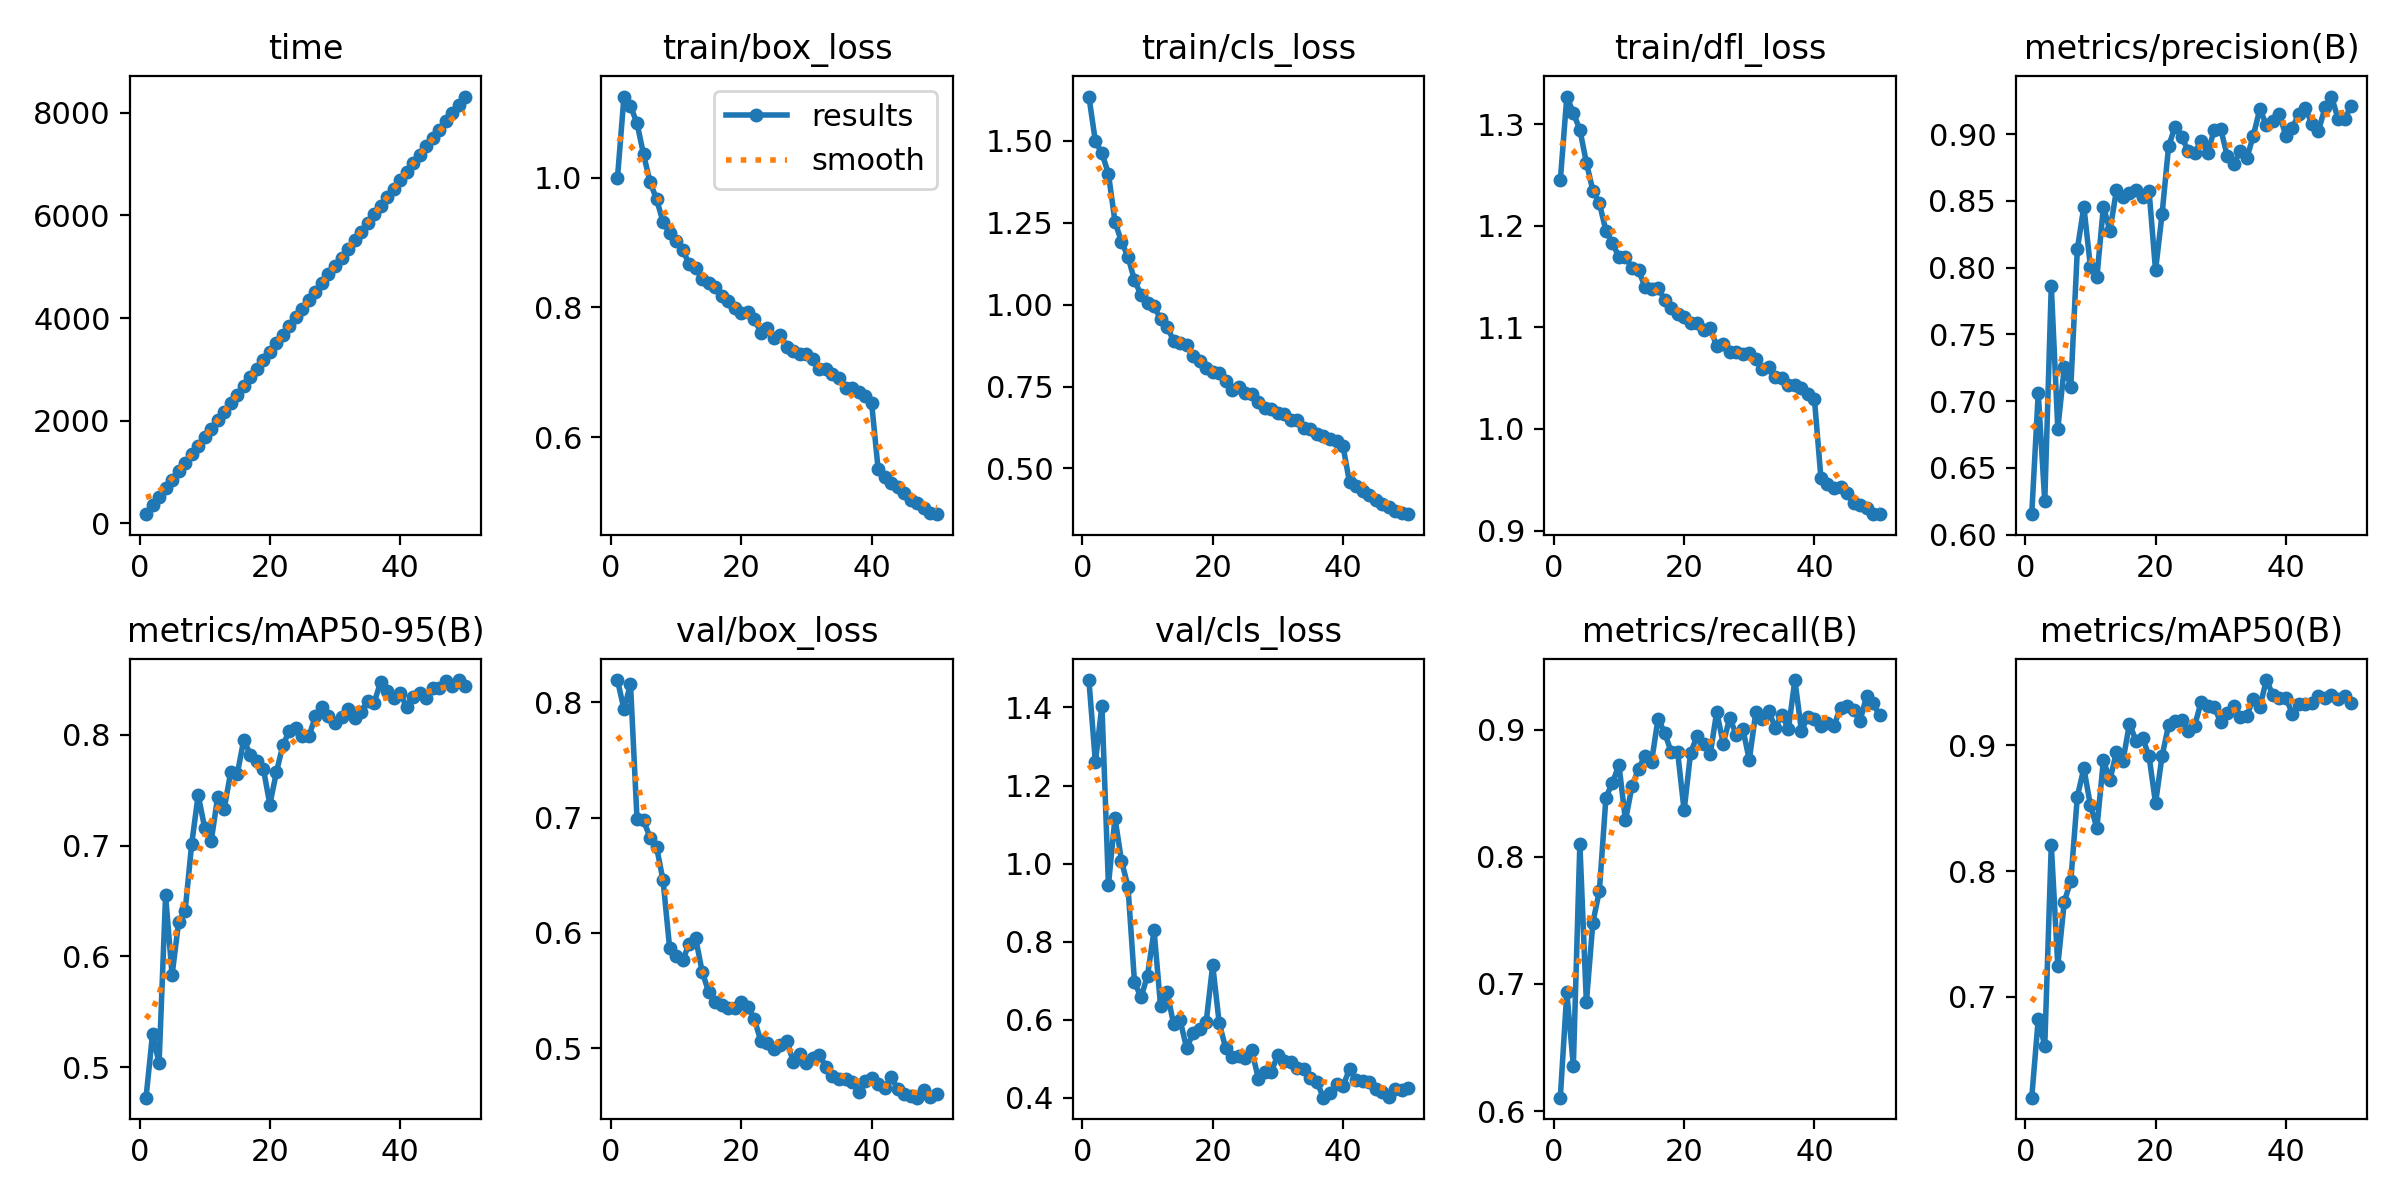

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

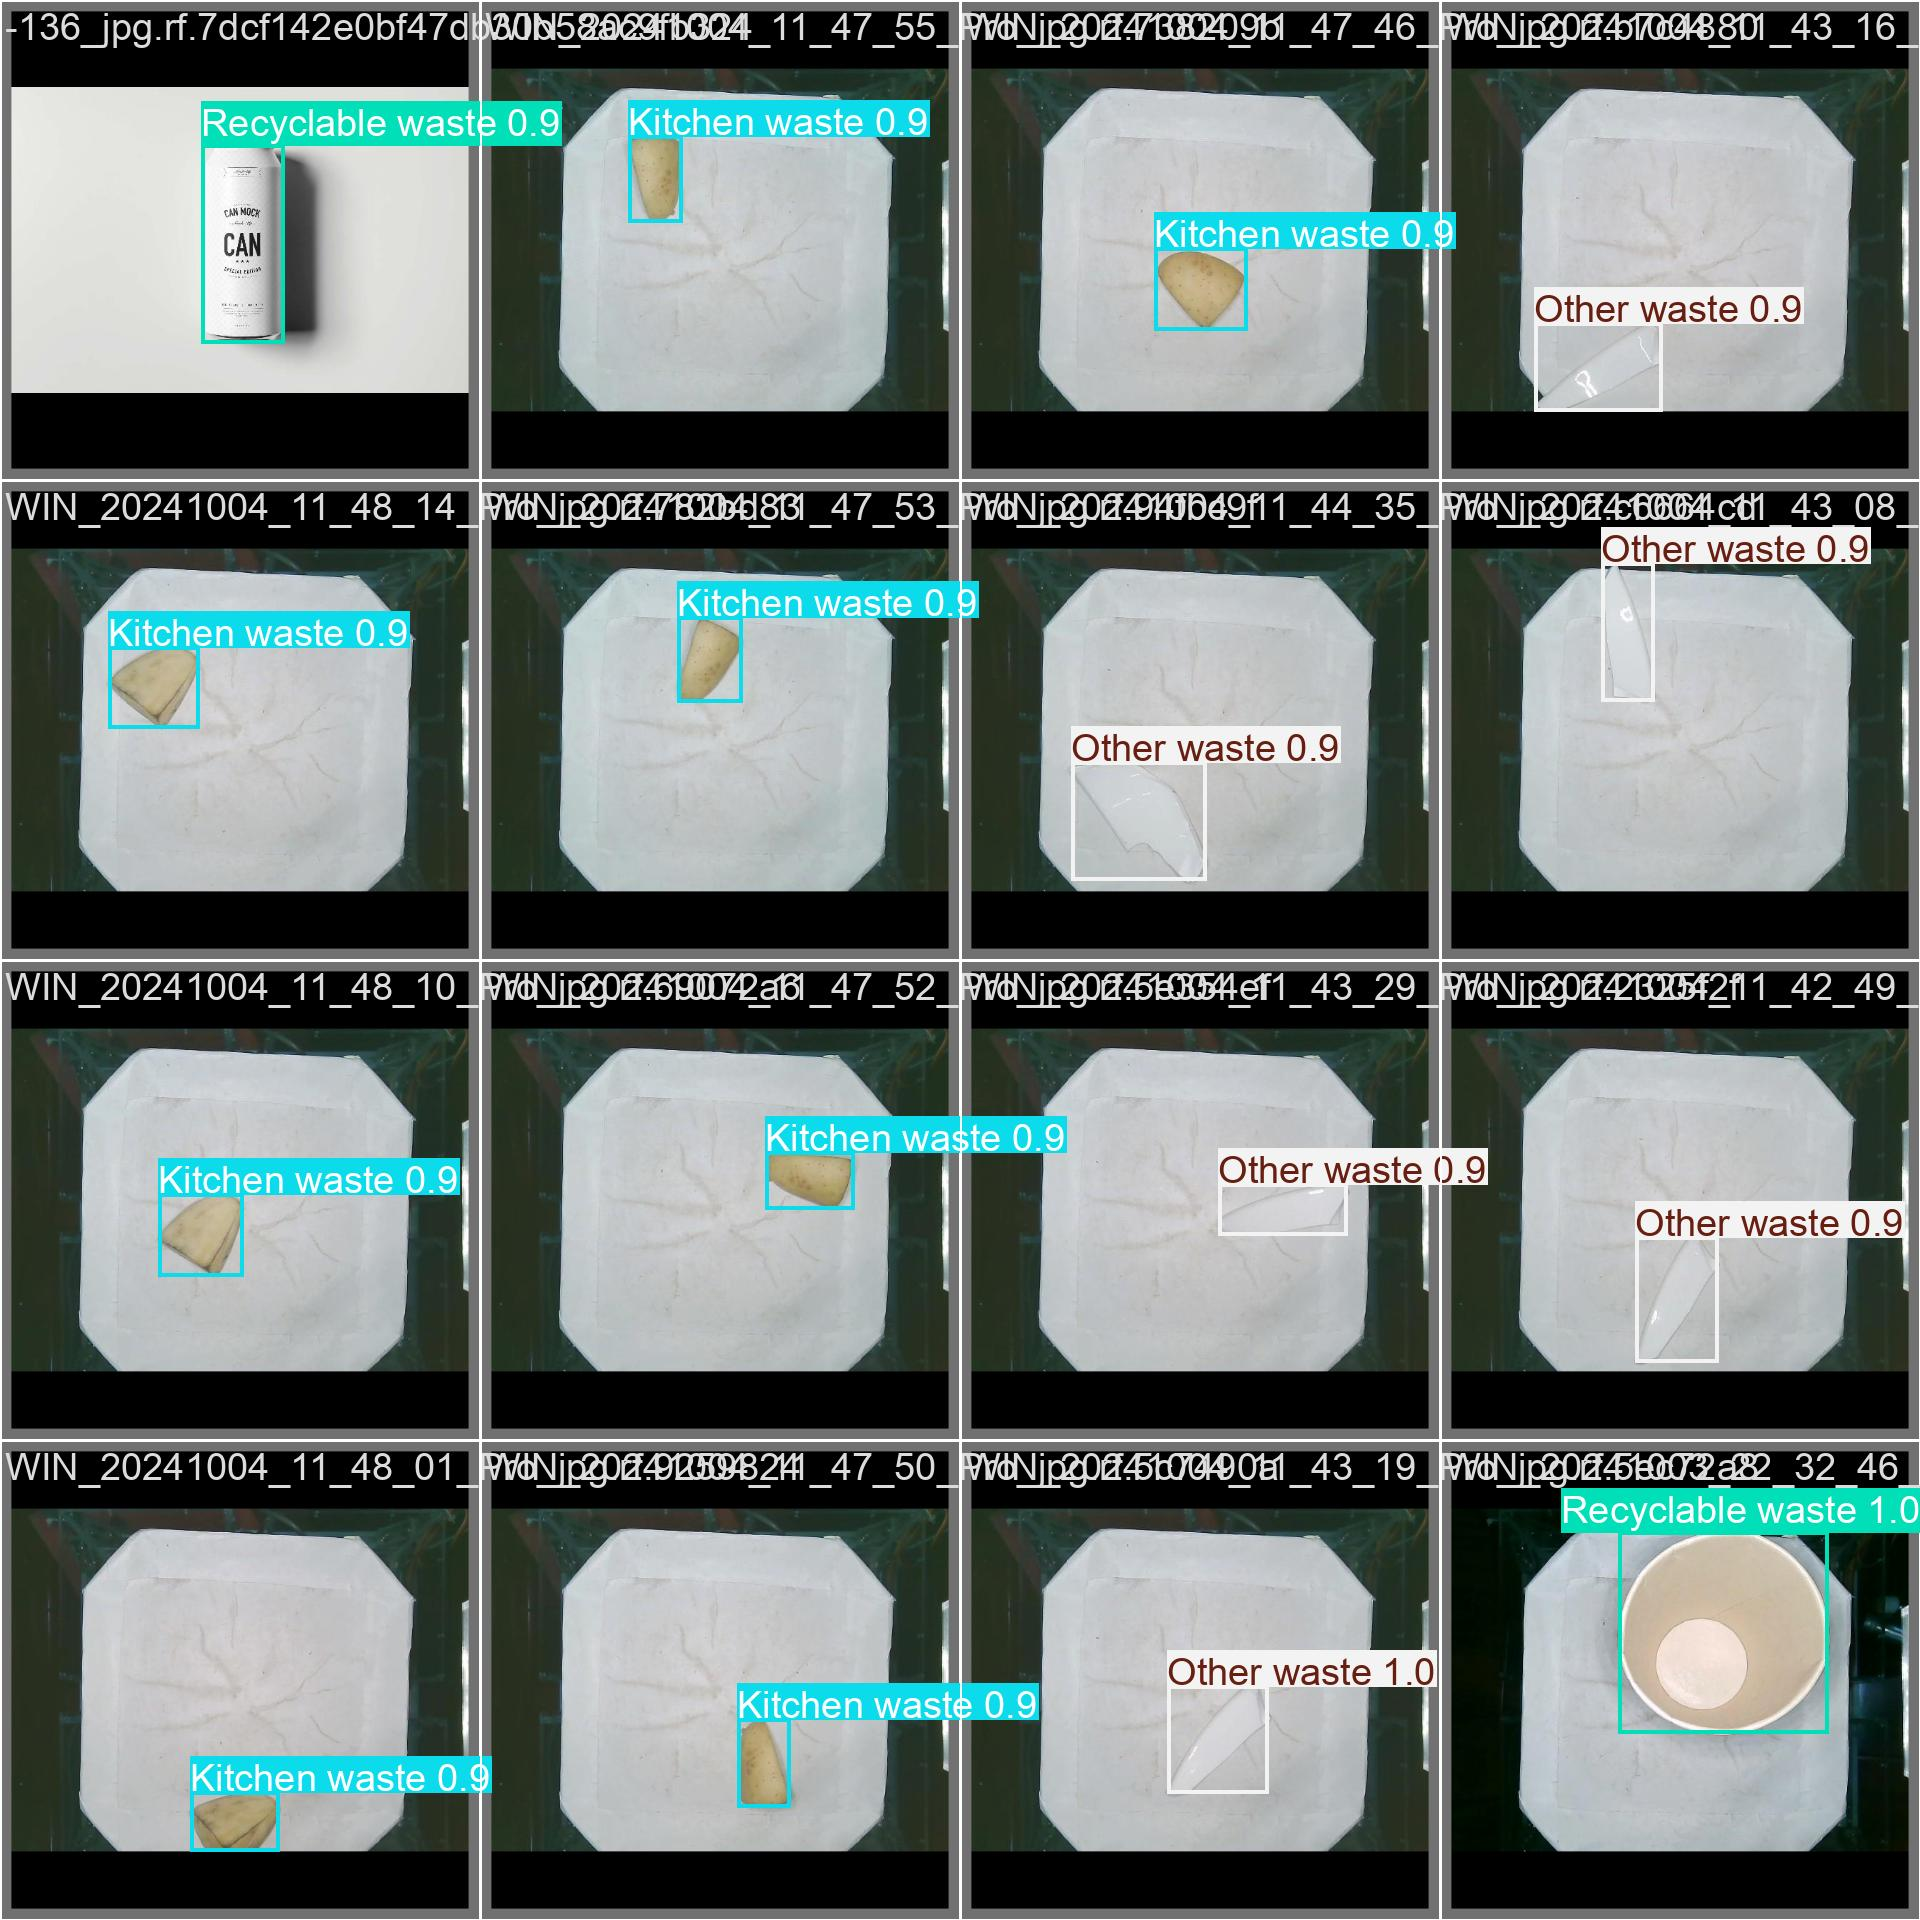

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Garbage-identification-17/valid/labels.cache... 432 images, 2 backgrounds, 0 corrupt: 100% 432/432 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 162, len(boxes) = 719. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:06<00:00,  3.95it/s]
                   all        432        719      0.911      0.921      0.939      0.849
       Hazardous waste        121        174      0.909      0.866      0.932      0.794
         Kitchen waste        110        181      0.919      0.956      0.923      0.829
           Other wast

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/200 /content/datasets/Garbage-identification-17/test/images/-8_jpg.rf.3678aaba58b8493ef9408d5c5bc7634b.jpg: 640x640 1 Kitchen waste, 23.1ms
image 2/200 /content/datasets/Garbage-identification-17/test/images/-_-_jpg.rf.b9d9f7dba2d61547a562ce507e6e5004.jpg: 640x640 1 Hazardous waste, 15.7ms
image 3/200 /content/datasets/Garbage-identification-17/test/images/-_-_jpg.rf.d9743e139c07be86779e32722fccbcc8.jpg: 640x640 1 Hazardous waste, 15.6ms
image 4/200 /content/datasets/Garbage-identification-17/test/images/-_-_jpg.rf.fe98aee3cbc735d4a9b584c1555f1b8c.jpg: 640x640 1 Hazardous waste, 1 Recyclable waste, 15.6ms
image 5/200 /content/datasets/Garbage-identification-17/test/images/02-Canette-dans-le-congelateur-1-_jpg.rf.05b1bc6bebf152dc7981da76701a9cc8.jpg: 640x640 1 Recyclable waste, 15.6ms
image 6/200 /content/datasets/

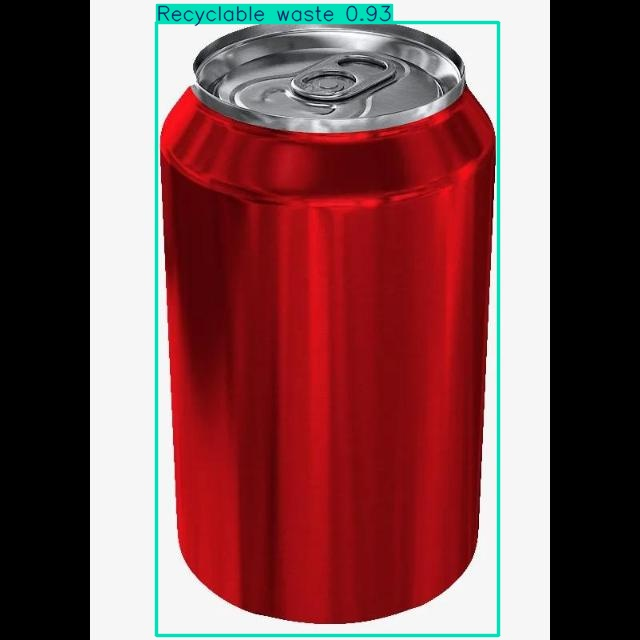

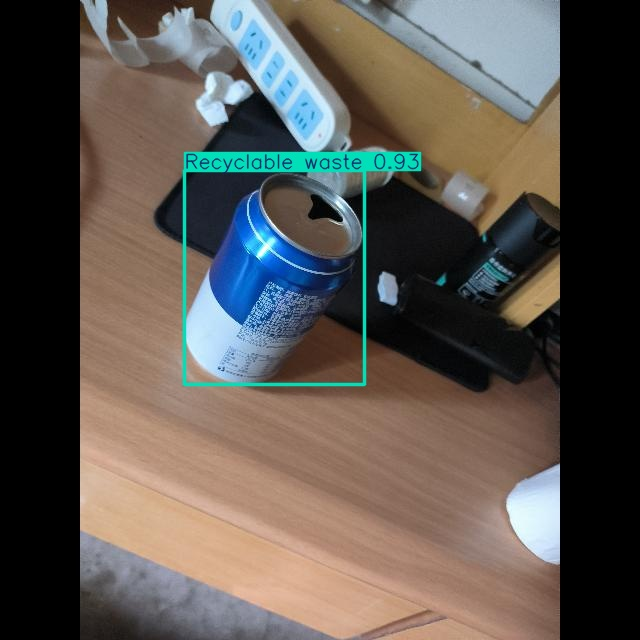

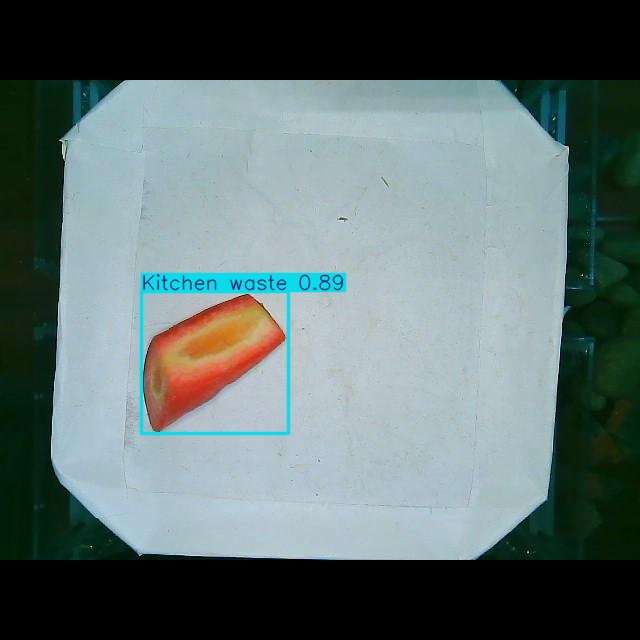

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
%pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/

In [ ]:
# Ensure required libraries are installed
%pip install gradio ultralytics supervision pillow

# Imports
import gradio as gr
from ultralytics import YOLO
from PIL import Image
import requests
import supervision as sv

# Load the YOLO model (replace with the correct model path)
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Ensure your trained YOLOv11 model is correctly placed

# Function to detect objects
def detect_objects(image):
    # Ensure image is a valid PIL image
    if not isinstance(image, Image.Image):
        image = Image.open(image)

    # Run model prediction
    result = model.predict(image)[0]

    # Get bounding boxes and confidence scores
    detections = sv.Detections.from_ultralytics(result)

    # Annotate the image with bounding boxes
    box_annotator = sv.BoxAnnotator()
    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=detections)

    # Optionally, add label annotations (confidence scores)
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections)

    return annotated_image  # Return the annotated image

# Create a Gradio interface
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="pil"),  # Input type as PIL image
    outputs="image",  # Output type as an annotated image
    title="YOLOv11 Object Detection",
    description="Upload an image and YOLOv11 will detect objects."
)

# Launch the Gradio interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1e3bc7de70ce4adce2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True